In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('Google Books.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   520 non-null    int64  
 1   Title        520 non-null    object 
 2   Authors      481 non-null    object 
 3   Description  433 non-null    object 
 4   Date         507 non-null    object 
 5   Rating       0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 24.5+ KB


In [42]:
df1 = df.drop_duplicates('Title', keep = 'last')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1 to 519
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   406 non-null    int64  
 1   Title        406 non-null    object 
 2   Authors      373 non-null    object 
 3   Description  337 non-null    object 
 4   Date         397 non-null    object 
 5   Rating       0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 22.2+ KB


In [44]:
df2 = df1[['Title', 'Description']].dropna(subset=['Description']).reset_index()

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        337 non-null    int64 
 1   Title        337 non-null    object
 2   Description  337 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.0+ KB


In [46]:
df2.head()

,index,Title,Description
0,1,Little Book of Psychology,If you want to know your Freud from your Jung ...
1,4,Counselling Psychology,Published on behalf by the British Psychologic...
2,5,Psychology AS,Offers guidance and support for studying Psych...
3,7,Science Fiction and Psychology,The psychologist may appear in science fiction...
4,9,The Book of Moods,"""Hilariously witty, unflinchingly honest, and ..."


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
Countvec = CountVectorizer(max_features=10, ngram_range=(1,1), lowercase = True, stop_words = 'english')

words_matrix = Countvec.fit_transform(df2['Description'])
words_array = words_matrix.toarray()
words_df = pd.DataFrame(words_array, columns = Countvec.get_feature_names())

In [49]:
Countvec_n = CountVectorizer(max_features=90, ngram_range=(2,3), lowercase = True, stop_words = 'english')

words_matrix_n = Countvec_n.fit_transform(df2['Description'])
words_array_n = words_matrix_n.toarray()
words_df_n = pd.DataFrame(words_array_n, columns = Countvec_n.get_feature_names())

In [50]:
words_all = pd.concat([words_df, words_df_n], axis=1)
top_words = pd.DataFrame(words_all.sum(axis=0).sort_values(ascending = False), columns = ['count'])

In [51]:
top_words.loc['psychology']/5

count    139.0
Name: psychology, dtype: float64

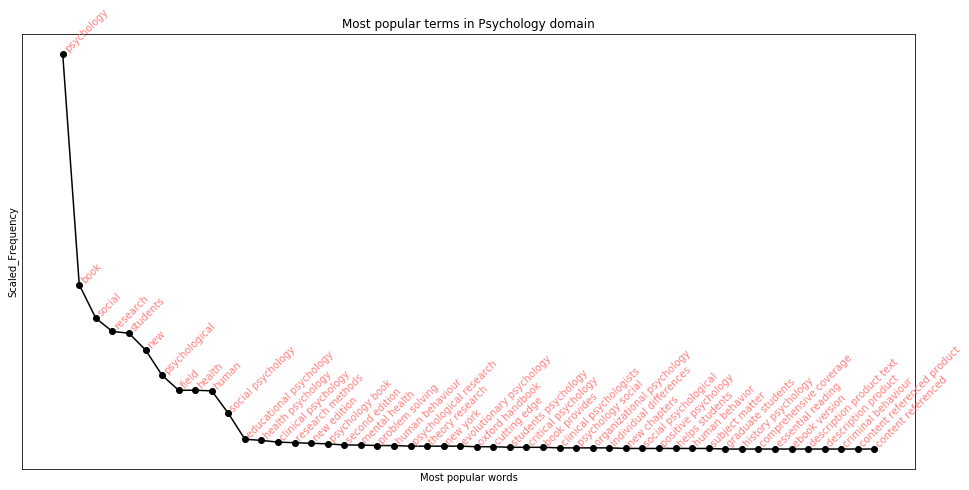

In [52]:
plt.figure(figsize=(16,8))
plt.plot(top_words[:50]['count']/50, marker='o', c='black')
plt.xticks([])
plt.yticks([])

i=0
for word in top_words[:50].index:
    plt.text(i, (top_words.loc[word]['count'] + 3)/50, word, rotation=45, color= (1, 0.5, 0.5))
    i = i+1
    

plt.xlabel('Most popular words')
plt.ylabel('Scaled_Frequency')
plt.title('Most popular terms in Psychology domain')
plt.show()